-----
<div class="alert alert-block alert-info">
<h1> Case Study 1 </h1>

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%config InlineBackend.figure_format = 'retina'

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### 1. Dataset Pre-processing

In [277]:
df = pd.read_csv('loans_full_schema.csv')
df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,C,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

#### 1.1 Remove NULL values

Let's see how many NULL values we have in our dataset.

In [279]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

Unfortunately there are columns where most of values are NULLs. They are completely useless, so just remove those columns where more than 1% of the rows for that column contain a null value.

In [280]:
df_cleaned = df[[label for label in df if df[label].isnull().sum() <= 0.01 * df.shape[0]]]

Let's see how it looks like now.

In [281]:
df_cleaned.isnull().sum()

state                            0
homeownership                    0
annual_income                    0
verified_income                  0
debt_to_income                  24
delinq_2y                        0
earliest_credit_line             0
inquiries_last_12m               0
total_credit_lines               0
open_credit_lines                0
total_credit_limit               0
total_credit_utilized            0
num_collections_last_12m         0
num_historical_failed_to_pay     0
current_accounts_delinq          0
total_collection_amount_ever     0
current_installment_accounts     0
accounts_opened_24m              0
num_satisfactory_accounts        0
num_accounts_30d_past_due        0
num_active_debit_accounts        0
total_debit_limit                0
num_total_cc_accounts            0
num_open_cc_accounts             0
num_cc_carrying_balance          0
num_mort_accounts                0
account_never_delinq_percent     0
tax_liens                        0
public_record_bankru

Ok, much better. Now we have to do something with those NULL values. We can:

* remove rows cointain NULL values,
* fill them with median or mode value,
* or use some imputation and try to predict their missing values.

Let's try the first option and see what will happen.

In [282]:
df_cleaned = df_cleaned.dropna()
df_cleaned.shape[0] / df.shape[0]

0.9976

It looks good, we removed less than 0.3% of rows. I think it's good enough and there's no point to do something more with that.

#### 1.2 Remove useless columns

Let's take a look on our cleaned dataset.

In [283]:
df_cleaned.head(10)

,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,10,70795,38767,0,0,0,1250,2,5,10,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,14,28800,4321,0,1,0,0,0,11,14,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,10,24193,16000,0,0,0,432,1,13,10,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,4,25400,4997,0,1,0,0,1,1,4,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,16,69839,52722,0,0,0,0,1,6,16,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,KY,OWN,34000.0,Not Verified,6.46,1,1990,6,32,12,42100,3898,0,0,0,0,0,2,12,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,MI,MORTGAGE,35000.0,Source Verified,23.66,0,2004,1,12,10,291852,18916,0,0,0,0,2,1,10,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,AZ,MORTGAGE,110000.0,Source Verified,16.19,1,2005,1,30,15,342336,60805,0,0,0,0,2,4,15,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,NV,MORTGAGE,65000.0,Source Verified,36.48,1,1998,3,35,21,283190,69561,0,0,0,0,6,10,21,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,C,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,IL,RENT,30000.0,Not Verified,18.91,0,2001,0,9,6,33114,17768,0,0,0,0,1,5,6,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


As we can see, "issue_month" only includes three values: "Jan-2018", "Feb-2018", and "Mar-2018". The time does not vary much and its impact to the applicant's credit profile is negligible. Thus column "issue_month" can be dropped.

The same goes for "disbursement_method" which only includes two values: "Cash" and "DirectPay". The impact of these methods to the applicant's credit profile can also be neglected. Thus column "disbursement_method" can also be dropped.

Since "sub_grade" (a grade assigned to the loan applicant based on his credit profile which determines the interest rate) has fully included the information of "grade", column "grade" can be dropped as well. A detailed explanation of subgrade can be found here: https://www.lendingclub.com/public/rates-and-fees.action

Since the three major US credit bureaus no longer include tax liens on your credit reports, a tax lien is no longer able to affect your credit. Thus, column "tax_liens" can be dropped. Details can be found here: https://www.bankrate.com/finance/credit-cards/how-tax-liens-affect-your-credit-score/, 

In [284]:
df_cleaned = df_cleaned.drop(["grade", "issue_month", "disbursement_method", "tax_liens"], axis=1)
df_cleaned.head(10)

,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,sub_grade,loan_status,initial_listing_status,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,10,70795,38767,0,0,0,1250,2,5,10,0,2,11100,14,8,6,1,92.9,0,moving,individual,28000,60,14.07,652.53,C3,Current,whole,27015.86,1999.33,984.14,1015.19,0.0
1,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,14,28800,4321,0,1,0,0,0,11,14,0,3,16500,24,14,4,0,100.0,1,debt_consolidation,individual,5000,36,12.61,167.54,C1,Current,whole,4651.37,499.12,348.63,150.49,0.0
2,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,10,24193,16000,0,0,0,432,1,13,10,0,3,4300,14,8,6,0,93.5,0,other,individual,2000,36,17.09,71.40,D1,Current,fractional,1824.63,281.80,175.37,106.43,0.0
3,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,4,25400,4997,0,1,0,0,1,1,4,0,2,19400,3,3,2,0,100.0,0,debt_consolidation,individual,21600,36,6.72,664.19,A3,Current,whole,18853.26,3312.89,2746.74,566.15,0.0
4,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,16,69839,52722,0,0,0,0,1,6,16,0,10,32700,20,15,13,0,100.0,0,credit_card,joint,23000,36,14.07,786.87,C3,Current,whole,21430.15,2324.65,1569.85,754.80,0.0
5,KY,OWN,34000.0,Not Verified,6.46,1,1990,6,32,12,42100,3898,0,0,0,0,0,2,12,0,1,27200,27,12,5,3,78.1,0,other,individual,5000,36,6.72,153.75,A3,Current,whole,4256.71,873.13,743.29,129.84,0.0
6,MI,MORTGAGE,35000.0,Source Verified,23.66,0,2004,1,12,10,291852,18916,0,0,0,0,2,1,10,0,3,9100,8,7,6,2,100.0,0,credit_card,joint,24000,60,13.59,553.35,C2,Current,whole,22560.00,2730.51,1440.00,1290.51,0.0
7,AZ,MORTGAGE,110000.0,Source Verified,16.19,1,2005,1,30,15,342336,60805,0,0,0,0,2,4,15,0,5,22250,16,12,10,7,93.0,0,debt_consolidation,individual,20000,60,11.99,444.79,B5,Current,whole,19005.39,1765.84,994.61,771.23,0.0
8,NV,MORTGAGE,65000.0,Source Verified,36.48,1,1998,3,35,21,283190,69561,0,0,0,0,6,10,21,0,11,36700,19,14,14,2,97.1,0,home_improvement,individual,20000,36,13.59,679.58,C2,Current,whole,18156.66,2703.22,1843.34,859.88,0.0
9,IL,RENT,30000.0,Not Verified,18.91,0,2001,0,9,6,33114,17768,0,0,0,0,1,5,6,0,3,14700,7,5,3,0,100.0,0,credit_card,individual,6400,36,6.71,196.77,A3,Current,fractional,6077.13,391.15,322.87,68.28,0.0


#### 1.3 Remove columns including values with insignificant frequencies and outlier rows

In [285]:
for label in list(df_cleaned):
    if len(df_cleaned[label].unique()) < 20:
        print(df_cleaned[label].value_counts())
        print("\n")

MORTGAGE    4778
RENT        3848
OWN         1350
Name: homeownership, dtype: int64


Source Verified    4115
Not Verified       3573
Verified           2288
Name: verified_income, dtype: int64


0     8556
1     1008
2      257
3       88
4       34
5       10
8        7
7        7
9        3
6        3
10       2
13       1
Name: delinq_2y, dtype: int64


0    9849
1     117
2       9
3       1
Name: num_collections_last_12m, dtype: int64


0     8564
1     1286
2       78
3       27
4       12
5        4
6        2
7        2
52       1
Name: num_historical_failed_to_pay, dtype: int64


0    9975
1       1
Name: current_accounts_delinq, dtype: int64


0    9975
1       1
Name: num_accounts_30d_past_due, dtype: int64


0     4470
1     1749
2     1527
3     1070
4      555
5      301
6      170
7       72
8       36
9       11
10       9
12       2
13       2
11       1
14       1
Name: num_mort_accounts, dtype: int64


0    8763
1    1193
2      17
3       3
Name: public_record_ban

We can see that features "current_accounts_delinq" and "num_accounts_30d_past_due" have only two possible values: 0 and 1, but with only 1 occurrences of 1 (less than 1%), so definitely they are insignificant.

The same goes for "num_collections_last_12m" feature (non-zero values have only 1.3% frequency).

Therefore we can drop these three columns.

Since >1 values in "num_historical_failed_to_pay", >1 values in "public_record_bankrupt", >2 values in "delinq_2y", >6 values in "num_mort_accounts" and values other than "Current" and "Fully Paid" in "loan_status" have very low frequency (less than 2%), we can remove these outliers. The same goes with "moving", "vacation" and "renewable energy" values in "loan_purpose".


In [286]:
df_cleaned = df_cleaned.drop(["current_accounts_delinq", "num_accounts_30d_past_due", "num_collections_last_12m"], axis=1)
df_cleaned = df_cleaned[df_cleaned['num_historical_failed_to_pay'] <= 2]
df_cleaned = df_cleaned[df_cleaned['public_record_bankrupt'] <= 1]
df_cleaned = df_cleaned[df_cleaned['delinq_2y'] <= 3]
df_cleaned = df_cleaned[df_cleaned['num_mort_accounts'] <= 7]
df_cleaned = df_cleaned[(df_cleaned['loan_status'] == "Current") | (df_cleaned['loan_status'] == "Fully Paid")]
df_cleaned = df_cleaned[(df_cleaned['loan_purpose'] == "debt_consolidation") | (df_cleaned['loan_purpose'] == "credit_card")
                       | (df_cleaned['loan_purpose'] == "other") | (df_cleaned['loan_purpose'] == "home_improvement")
                       | (df_cleaned['loan_purpose'] == "major_purchase") | (df_cleaned['loan_purpose'] == "medical")
                       | (df_cleaned['loan_purpose'] == "house") | (df_cleaned['loan_purpose'] == "car")
                       | (df_cleaned['loan_purpose'] == "small_business") | (df_cleaned['loan_purpose'] == "moving")]
df_cleaned.head(10)

,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_historical_failed_to_pay,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_satisfactory_accounts,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,sub_grade,loan_status,initial_listing_status,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,10,70795,38767,0,1250,2,5,10,2,11100,14,8,6,1,92.9,0,moving,individual,28000,60,14.07,652.53,C3,Current,whole,27015.86,1999.33,984.14,1015.19,0.0
1,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,14,28800,4321,1,0,0,11,14,3,16500,24,14,4,0,100.0,1,debt_consolidation,individual,5000,36,12.61,167.54,C1,Current,whole,4651.37,499.12,348.63,150.49,0.0
2,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,10,24193,16000,0,432,1,13,10,3,4300,14,8,6,0,93.5,0,other,individual,2000,36,17.09,71.40,D1,Current,fractional,1824.63,281.80,175.37,106.43,0.0
3,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,4,25400,4997,1,0,1,1,4,2,19400,3,3,2,0,100.0,0,debt_consolidation,individual,21600,36,6.72,664.19,A3,Current,whole,18853.26,3312.89,2746.74,566.15,0.0
4,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,16,69839,52722,0,0,1,6,16,10,32700,20,15,13,0,100.0,0,credit_card,joint,23000,36,14.07,786.87,C3,Current,whole,21430.15,2324.65,1569.85,754.80,0.0
5,KY,OWN,34000.0,Not Verified,6.46,1,1990,6,32,12,42100,3898,0,0,0,2,12,1,27200,27,12,5,3,78.1,0,other,individual,5000,36,6.72,153.75,A3,Current,whole,4256.71,873.13,743.29,129.84,0.0
6,MI,MORTGAGE,35000.0,Source Verified,23.66,0,2004,1,12,10,291852,18916,0,0,2,1,10,3,9100,8,7,6,2,100.0,0,credit_card,joint,24000,60,13.59,553.35,C2,Current,whole,22560.00,2730.51,1440.00,1290.51,0.0
7,AZ,MORTGAGE,110000.0,Source Verified,16.19,1,2005,1,30,15,342336,60805,0,0,2,4,15,5,22250,16,12,10,7,93.0,0,debt_consolidation,individual,20000,60,11.99,444.79,B5,Current,whole,19005.39,1765.84,994.61,771.23,0.0
8,NV,MORTGAGE,65000.0,Source Verified,36.48,1,1998,3,35,21,283190,69561,0,0,6,10,21,11,36700,19,14,14,2,97.1,0,home_improvement,individual,20000,36,13.59,679.58,C2,Current,whole,18156.66,2703.22,1843.34,859.88,0.0
9,IL,RENT,30000.0,Not Verified,18.91,0,2001,0,9,6,33114,17768,0,0,1,5,6,3,14700,7,5,3,0,100.0,0,credit_card,individual,6400,36,6.71,196.77,A3,Current,fractional,6077.13,391.15,322.87,68.28,0.0


In [287]:
df_cleaned.shape[0] / df.shape[0]

0.9541

So the removed records are no more than 5%, which means the cleaned dataset can still represent the original dataset well.

#### 1.4 Categorical features

To use any machine learning model we have to have only numerical data. So, let's do something with our non-numerical features.

In [288]:
df_cleaned.select_dtypes(include=["object"]).head()

,state,homeownership,verified_income,loan_purpose,application_type,sub_grade,loan_status,initial_listing_status
0,NJ,MORTGAGE,Verified,moving,individual,C3,Current,whole
1,HI,RENT,Not Verified,debt_consolidation,individual,C1,Current,whole
2,WI,RENT,Source Verified,other,individual,D1,Current,fractional
3,PA,RENT,Not Verified,debt_consolidation,individual,A3,Current,whole
4,CA,RENT,Verified,credit_card,joint,C3,Current,whole


Since each grade (A, B, C, D, E, F) and the associated subgrade have its own sequence, we can map them into integers.

In [289]:
def subgrade_mapping(lst: list) -> dict:
    mapping = {}
    for subgrade in lst:
        
        subgrade = subgrade.strip()
        letter = subgrade[0]
        num = int(subgrade[1])
        if letter == 'A':
            m = 0
        elif letter == 'B':
            m = 1
        elif letter == 'C':
            m = 2
        elif letter == 'D':
            m = 3
        elif letter == 'E':
            m = 4
        elif letter == 'F':
            m = 5
        elif letter == 'G':
            m = 6
        else:
            m = np.nan
        
        mapping[subgrade] = m*5+num
    return mapping

df_cleaned["sub_grade"] = df_cleaned["sub_grade"].map(subgrade_mapping(df_cleaned["sub_grade"].unique()))

To show the impact of states, let's plot the average interest rate by states on the US map:

In [290]:
df_avg_by_state = df_cleaned.groupby('state').mean()
df_avg_by_state = df_avg_by_state.reset_index()

import plotly.express as px

fig = px.choropleth(df_avg_by_state,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="interest_rate",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states',# Set to plot as US States
                    color_continuous_scale="purp") #set color scale
fig.update_layout(
    title_text = 'Interest Rate by States', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show() 

As we can see from the plot above, the average interest rate has no significant difference among different states, and there is also no significant trend on the map. Thus, we decide to drop this feature otherwise too many dummy indicators will be created.

In [291]:
df_cleaned = df_cleaned.drop(["state"], axis=1)

The rest of the categorical features can be either mapped to integers, or to dummy indicators.

In [292]:
#df_cleaned["initial_list_status"] = df_cleaned["initial_list_status"].map({"fractional": 1, "whole": 0})
df_cleaned["application_type"] = df_cleaned["application_type"].map({"individual": 1, "joint": 0})
df_cleaned["loan_status"] = df_cleaned["loan_status"].map({"Current": 1, "Fully Paid": 0})
df_cleaned["verified_income"] = df_cleaned["verified_income"].map({"Not Verified": 2, "Source Verified": 1, "Verified": 0})
df_cleaned["homeownership"] = df_cleaned["homeownership"].map({"RENT": 2, "MORTGAGE": 1, "OWN": 0})
df_cleaned = pd.get_dummies(df_cleaned, columns=list(df_cleaned.select_dtypes(include=["object"])))

We can calculate the correlation matrix for the cleaned dataset, and then plot the values int the heatmap:

In [293]:
C = df_cleaned.corr()
C

,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_historical_failed_to_pay,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,num_satisfactory_accounts,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,application_type,loan_amount,term,interest_rate,installment,sub_grade,loan_status,balance,paid_total,paid_principal,paid_interest,paid_late_fees,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_small_business,initial_listing_status_fractional,initial_listing_status_whole
homeownership,1.000000,-0.079151,0.046019,-0.042820,-0.046980,0.211652,-0.072834,-0.157440,-0.104927,-0.283807,-0.068260,-0.002658,-0.004945,0.043023,-0.071533,-0.104639,-0.047257,-0.114023,-0.138289,-0.107153,-0.076228,-0.321788,0.009235,-0.002558,0.080238,-0.090876,-0.049457,0.065004,-0.073472,0.067836,0.021573,-0.078949,-0.041171,-0.038193,-0.028390,0.015689,0.009826,0.028877,0.015785,-0.127068,-0.050094,0.030829,-0.012787,0.057043,0.024794,0.009756,0.029464,-0.029464
annual_income,-0.079151,1.000000,-0.010704,-0.178030,0.048327,-0.149604,0.083841,0.213732,0.183229,0.516991,0.404094,0.010090,-0.000138,0.099841,0.095786,0.183401,0.162406,0.332041,0.128651,0.118596,0.132248,0.239187,-0.006972,-0.035825,0.106248,0.327749,0.045115,-0.104302,0.318780,-0.109953,-0.028886,0.281012,0.166830,0.147156,0.172583,-0.007632,-0.022375,-0.021906,-0.011737,0.062172,0.002867,0.055108,-0.002275,-0.007368,-0.032712,0.023846,-0.055484,0.055484
verified_income,0.046019,-0.010704,1.000000,-0.104378,-0.016718,-0.028915,-0.085276,-0.005464,-0.020913,-0.094120,-0.070793,-0.011963,-0.000731,-0.005425,-0.085576,-0.020235,-0.014165,0.025117,0.014430,-0.008414,-0.031361,-0.057784,-0.001943,-0.013765,0.111252,-0.220700,-0.130138,-0.247306,-0.221725,-0.250659,0.014012,-0.204414,-0.091650,-0.060669,-0.247743,-0.015268,0.023286,0.103593,-0.047814,0.000157,-0.029334,-0.003245,-0.005214,-0.046367,-0.042363,-0.013484,-0.006187,0.006187
debt_to_income,-0.042820,-0.178030,-0.104378,1.000000,-0.030423,-0.091753,0.026617,0.200139,0.216616,0.079804,0.238920,0.004759,0.019678,0.199417,0.070386,0.216519,0.146236,0.065923,0.128460,0.135926,0.188512,0.043056,0.077484,0.013845,-0.318629,0.058515,0.049488,0.142798,0.067457,0.146867,0.026220,0.068380,-0.003740,-0.019796,0.121262,-0.006199,-0.029387,0.015702,0.074237,-0.014206,-0.054975,-0.055496,-0.009831,-0.013856,-0.055895,-0.018991,0.009768,-0.009768
delinq_2y,-0.046980,0.048327,-0.016718,-0.030423,1.000000,-0.079991,0.009196,0.053625,0.008526,0.047853,-0.017248,-0.043315,0.020699,-0.017115,-0.049808,0.007397,-0.022765,-0.084205,0.054412,0.008561,0.000160,0.065874,-0.403156,-0.059265,-0.006613,-0.029017,-0.024053,0.092866,-0.009993,0.098128,-0.012819,-0.032429,0.008633,0.006073,0.020649,-0.007722,0.007828,-0.028821,0.009500,0.045316,-0.010271,-0.003097,-0.006186,-0.002045,-0.003603,-0.010292,0.030267,-0.030267
earliest_credit_line,0.211652,-0.149604,-0.028915,-0.091753,-0.079991,1.000000,0.045049,-0.292755,-0.171671,-0.227273,-0.138721,-0.055915,-0.018980,0.016830,0.027144,-0.169864,-0.126503,-0.236824,-0.310141,-0.182461,-0.165881,-0.286874,0.099801,-0.042526,0.045813,-0.118449,-0.037255,0.103934,-0.098462,0.110941,0.005429,-0.108358,-0.040014,-0.035979,-0.036245,0.015065,0.021914,0.032448,-0.041879,-0.053206,-0.011045,0.037923,-0.019169,0.024761,0.037019,0.022811,0.023377,-0.023377
inquiries_last_12m,-0.072834,0.083841,-0.085276,0.026617,0.009196,0.045049,1.000000,0.211719,0.190512,0.132627,0.122710,0.073274,0.043737,0.082437,0.430137,0.190106,0.053699,0.010620,0.158445,0.165867,0.08590

In [294]:
import seaborn as sns

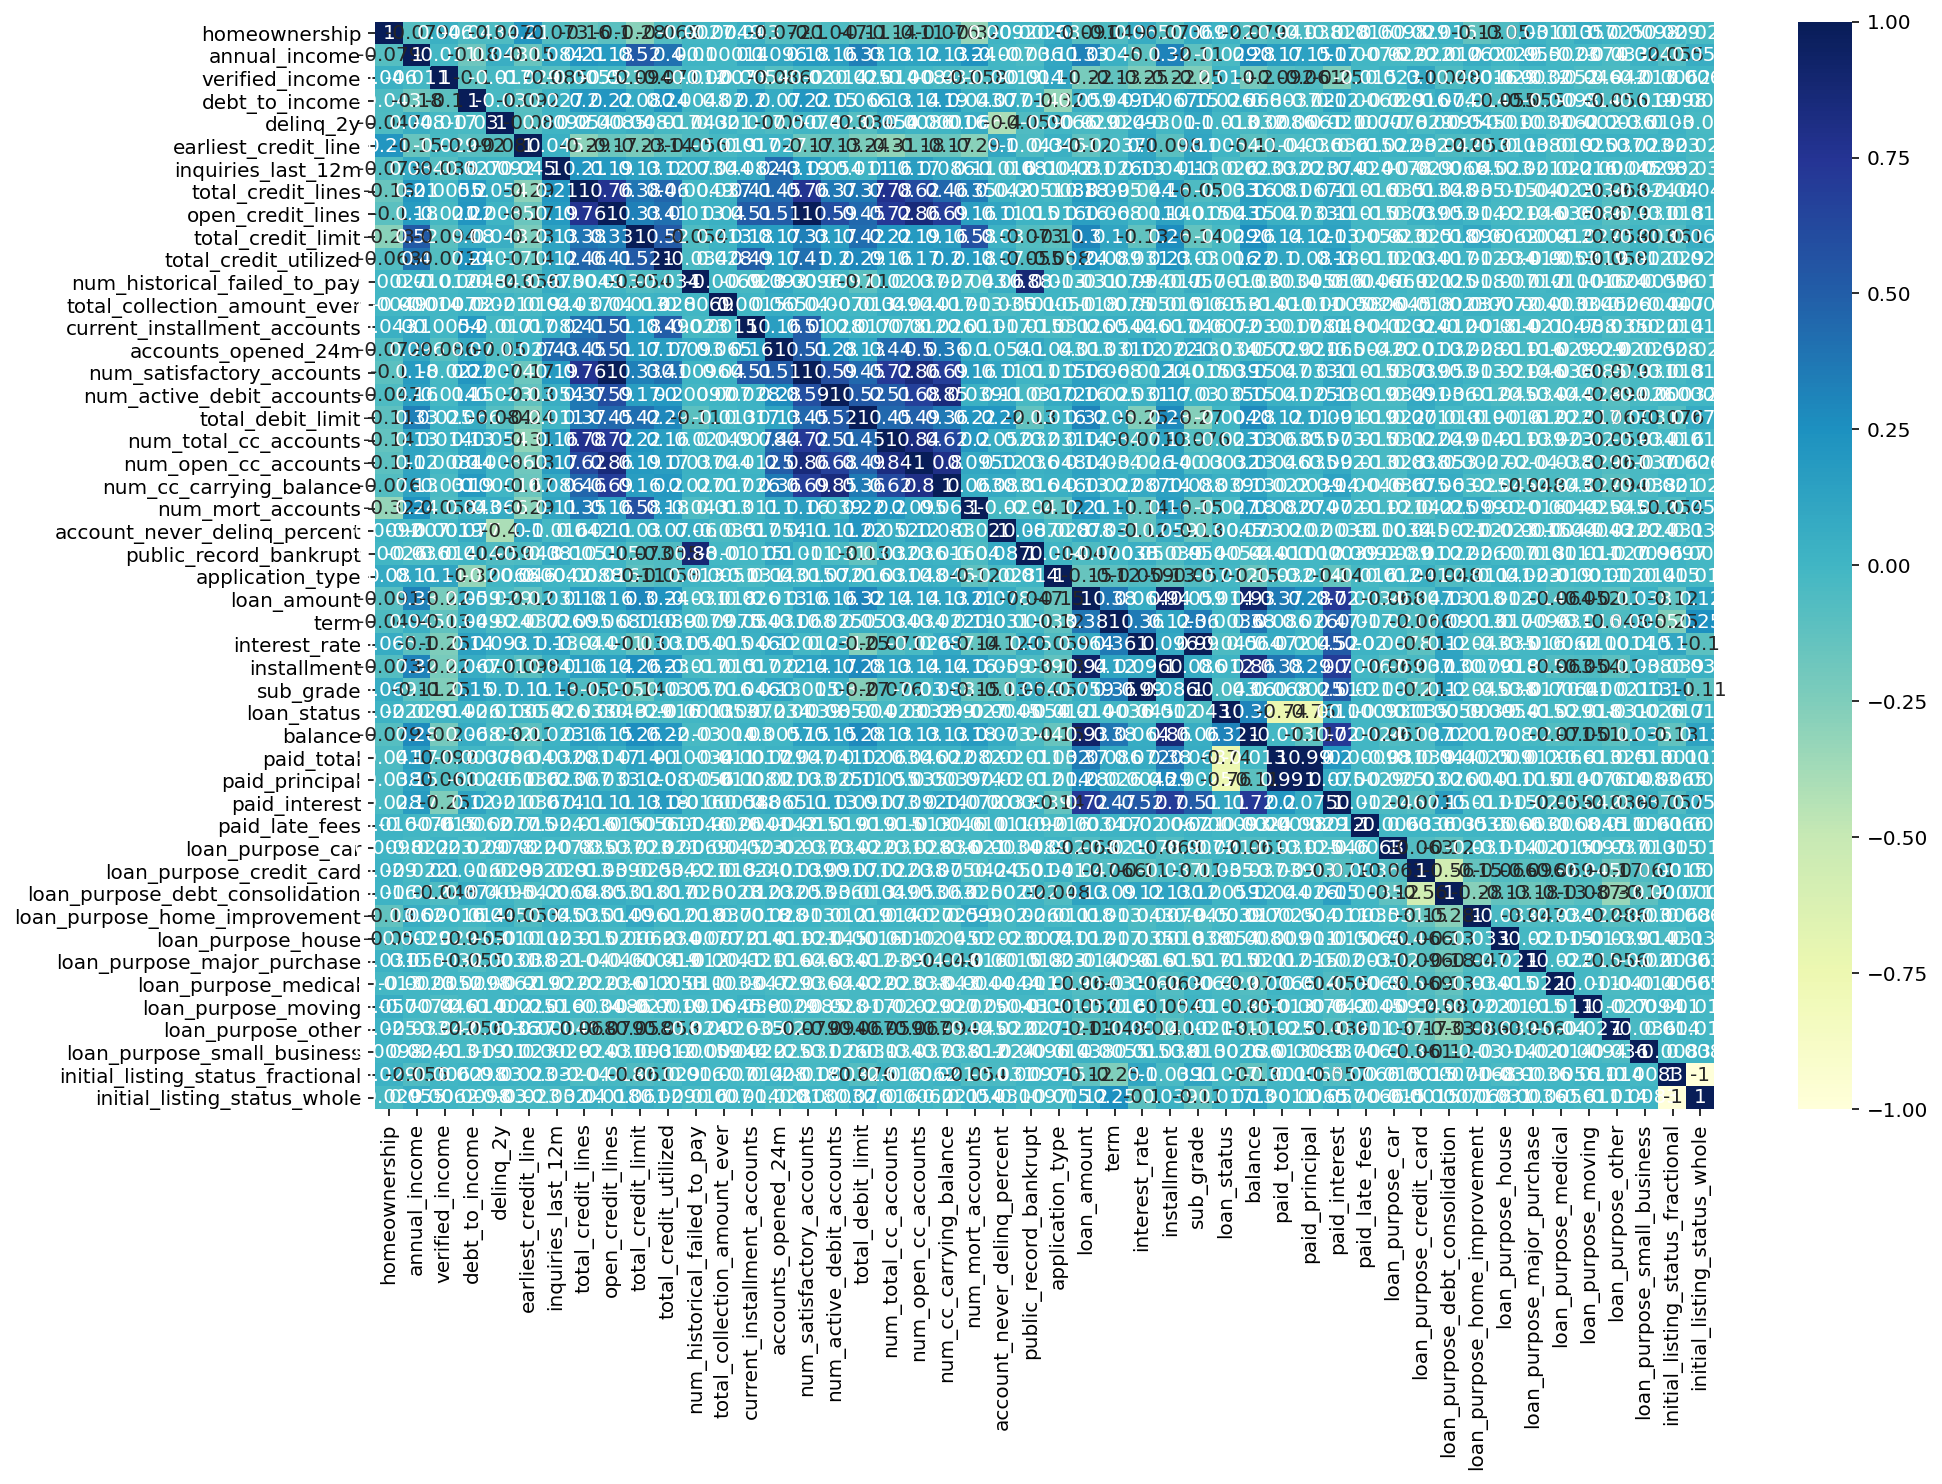

In [233]:
# Visualizing the data using heatmap
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df_cleaned.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [295]:
C['interest_rate']

homeownership                        0.065004
annual_income                       -0.104302
verified_income                     -0.247306
debt_to_income                       0.142798
delinq_2y                            0.092866
earliest_credit_line                 0.103934
inquiries_last_12m                   0.127561
total_credit_lines                  -0.044336
open_credit_lines                   -0.010868
total_credit_limit                  -0.131637
total_credit_utilized                0.030728
num_historical_failed_to_pay         0.053766
total_collection_amount_ever         0.014539
current_installment_accounts         0.046329
accounts_opened_24m                  0.121979
num_satisfactory_accounts           -0.011504
num_active_debit_accounts            0.031269
total_debit_limit                   -0.254728
num_total_cc_accounts               -0.070805
num_open_cc_accounts                -0.026397
num_cc_carrying_balance              0.086763
num_mort_accounts                 

As we can see from the graph and table above, the most relevant variable is sub_grade (0.993) and paid_interest(0.522)
We can plot them as scatter plots to see the data distribution!

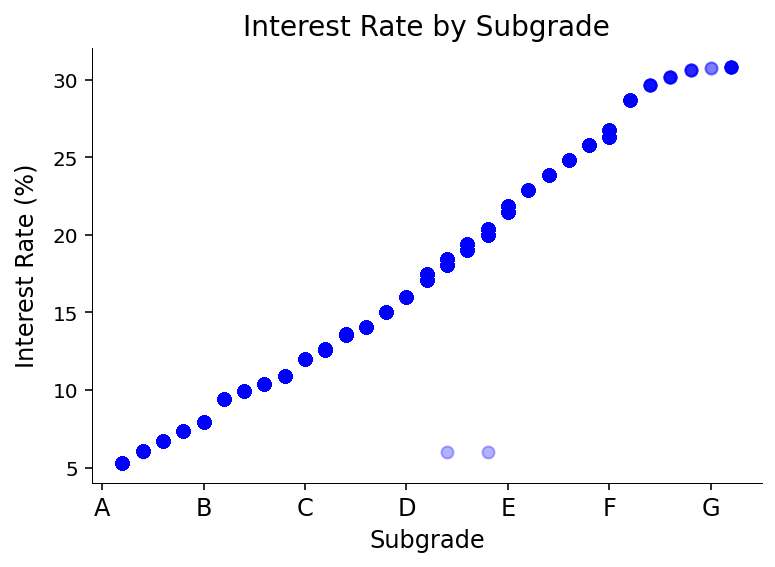

In [296]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_cleaned['sub_grade'], df_cleaned['interest_rate'], color='blue', alpha=0.3)

ax.set_xlabel('Subgrade', fontsize=12)
ax.set_ylabel('Interest Rate (%)', fontsize=12)
ax.set_title("Interest Rate by Subgrade", size=14)
# Set numerical y axis
ax.yaxis.set_label_coords(-0.08, 0.5)
# Set categorical ticks for x axis
ax.set_xticks(np.arange(7)*5)
ax.set_xticklabels(['A','B','C','D', 'E', 'F', 'G'], size=12)
#ax.tick_params(axis='x', length=0)    #Hide ticks in x axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.show()

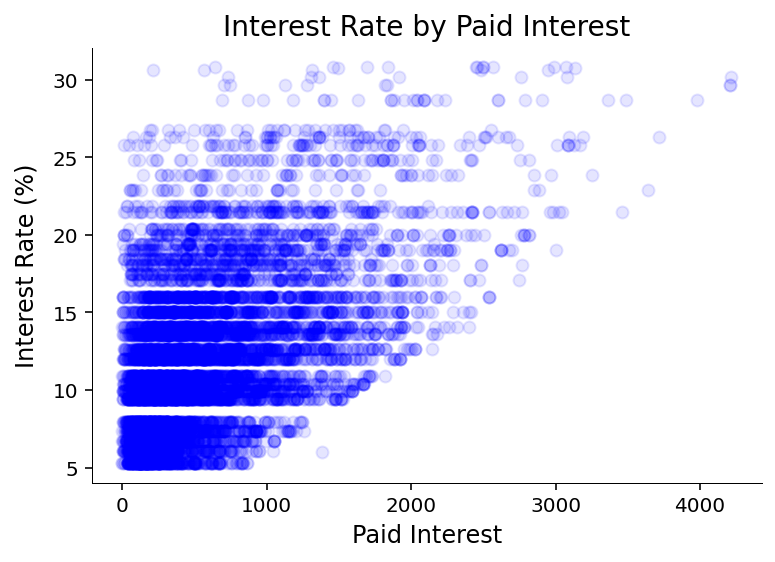

In [297]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_cleaned['paid_interest'], df_cleaned['interest_rate'], color='blue', alpha=0.1)

ax.set_xlabel('Paid Interest', fontsize=12)
ax.set_ylabel('Interest Rate (%)', fontsize=12)
ax.set_title("Interest Rate by Paid Interest", size=14)
# Set numerical y axis
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)


plt.show()

We can even plot them into 3D graph:

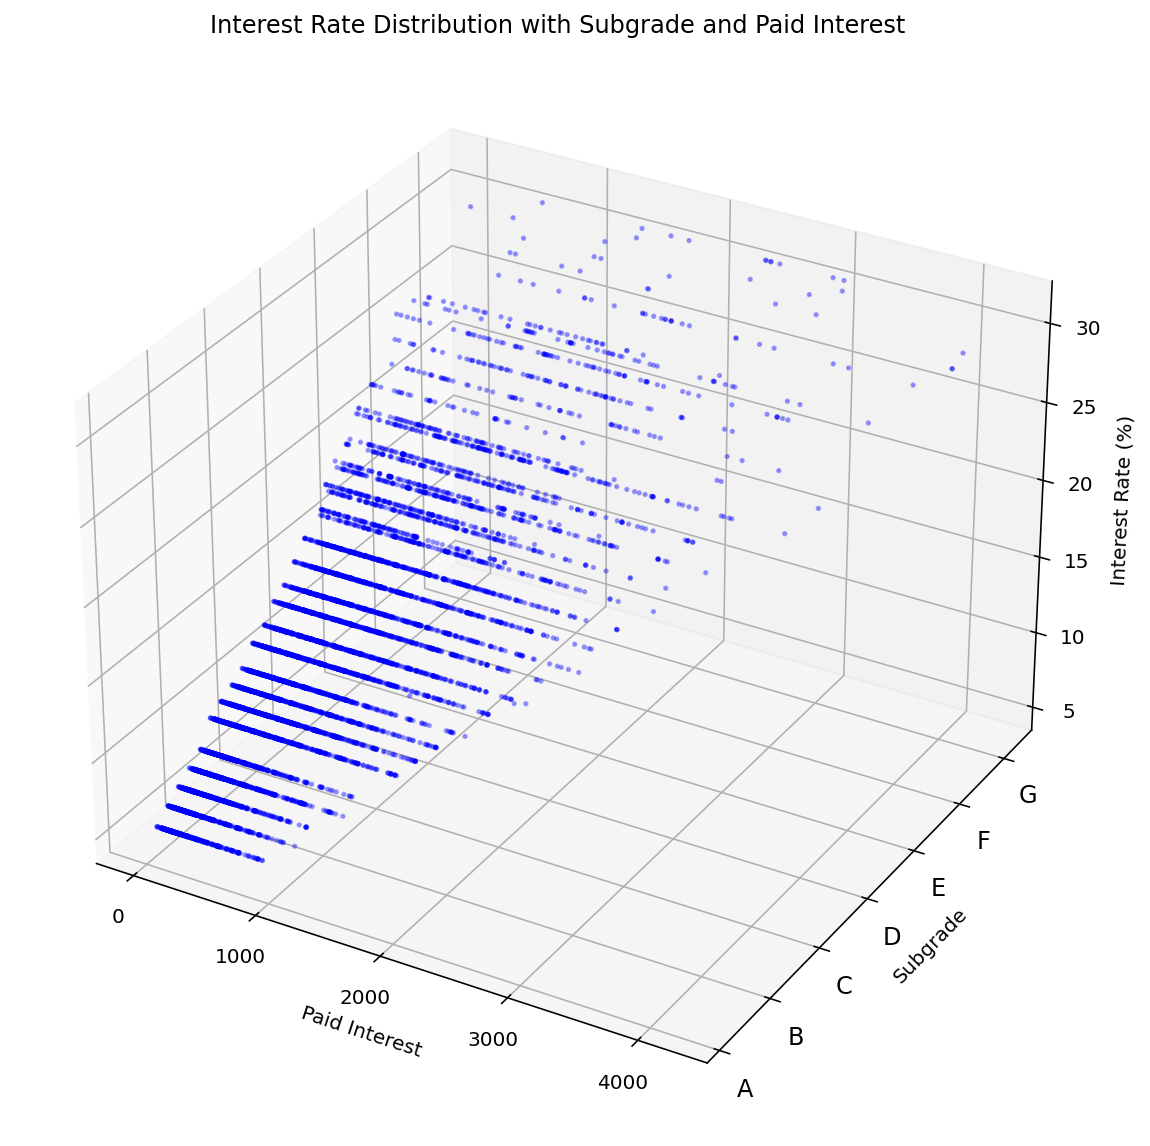

In [298]:
from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (30, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_cleaned['paid_interest'], df_cleaned['sub_grade'], df_cleaned['interest_rate'],
             color = 'blue', s=3,alpha=0.3)

# Set categorical ticks for y axis
ax.set_yticks(np.arange(7)*5)
ax.set_yticklabels(['A','B','C','D', 'E', 'F', 'G'], size=12)

ax.set_xlabel('Paid Interest')
ax.set_ylabel('Subgrade')
ax.set_zlabel('Interest Rate (%)')
plt.title("Interest Rate Distribution with Subgrade and Paid Interest")
 
# show plot
plt.show()

As we can see from the graphs above, subgrade has a strong linear correlation to interest rate; paid interest mainly determine the lower limit of the interest rate, but has no restraint to the upper limit.

### 2. Model

In [300]:
def get_XY(df, y_label):
    yn = df[y_label].to_numpy()
    #yn = df[y_label].as_matrix()
    Xn = df.drop(y_label, axis=1).to_numpy()
    #Xn = df.drop(y_label, axis=1).as_matrix()
    return Xn, yn


X, y = get_XY(df_cleaned, "interest_rate")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

indexes = [j for j in range(len(X_train))]
np.random.shuffle(indexes)
X_train = X_train[indexes]
y_train = y_train[indexes]

X_train, X_test = norm_data(X_train), norm_data(X_test)

Well, data is so big and my computer doesn't have enough memory. I decided to choose only the most improtant features (10).
Two algorithms are used: KNN and Random Forest.

In [301]:
pca = PCA(n_components=10)
fit = pca.fit(X_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

In [302]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [304]:
print("--- Start kNN training")
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("--- Start kNN prediction")
y_val_knn = knn.prtedict(X_val)

print("--- Start Random Forest training")
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print("--- Start Random Forest prediction")
y_val_forest = forest.predict(X_val)

--- Start kNN training


ValueError: Unknown label type: 'continuous'

Due to time limit, the machine learning model is not finished. However I believe the predictions would be quite accurate based on the previous discussions. 

In [ ]:
y_pred = svc.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("""final results: 
- acc: %.2f
- F1: %.2f""" % (acc(y_test, y_pred), f1_score(y_test, y_pred)))